<a href="https://colab.research.google.com/github/jvo012/ads-500b-project/blob/main/Final_Project_Team_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Sales

Dataset 2 (house_sales.csv) has data related to house sales for a county in Washington state.

In [26]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Part 1: Data Importing and Pre-processing

1.1 Import dataset and describe characteristics such as dimensions, data types, 
file types, and import methods used <br>
1.2 Clean, wrangle, and handle missing data <br>
1.3 Transform data appropriately using techniques such as aggregation, normalization, and feature construction <br>
1.4 Reduce redundant data and perform need based discretization

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/jvo012/ads-500b-project/main/house_sales.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
# Identify the data types of initial variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
# Drop "ID", "long", and "lat" columns
# These columns are irrelevant values that are too specific and do not fit the requirements needed for our analysis on the house market.
df.drop(["id","long","lat"], axis=1, inplace = True)

# Column "yr_renovated" converted to binary values (0=No, 1=Yes)
# The year of renovation is an irrelevant observation. Instead, homes that were renovated have the value 1 (True), unrenovated homes kept the value 0 (False) 
df['yr_renovated'] = (df['yr_renovated'] > 0).astype(bool)
df['sqft_basement'] = (df['sqft_basement'] > 0).astype(bool)

# Determine the index corresponding to the max value of "bedrooms"
x = df['bedrooms'].idxmax()

# Display "sqft_lot" at max value of bedrooms
print("Sqft_lot at max value of bedrooms: ", df.loc[x, 'sqft_living'])

# 33 bedroom count highly unlikely given the corresponding "sqft_living" value of "1620.0"; likely data entry error
# Replace "33" bedroom column count by "3"
df['bedrooms'] = np.where(df['bedrooms'] == 33, 3, df['bedrooms'])

# Converted data type to date_time
# Changed the data type in order to use for further analysis.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d %H:%M:%S')

Sqft_lot at max value of bedrooms:  1620.0


In [30]:
# Count of missing values per column
df.isnull().sum()

date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [31]:
# Verify columns do not contain "0" value
print("Price 0 values: ", '0' in df.price.values)
print("Bathroom 0 values: ", '0' in df.bathrooms.values)
print("Bedroom 0 values: ", '0' in df.bedrooms.values)
print("Sqft_living 0 values: ", '0' in df.sqft_living.values)
print("Sqft_lot 0 values: ", '0' in df.sqft_lot.values)
print("Floors 0 values: ", '0' in df.floors.values)

Price 0 values:  False
Bathroom 0 values:  False
Bedroom 0 values:  False
Sqft_living 0 values:  False
Sqft_lot 0 values:  False
Floors 0 values:  False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e303dee90>]],
      dtype=object)

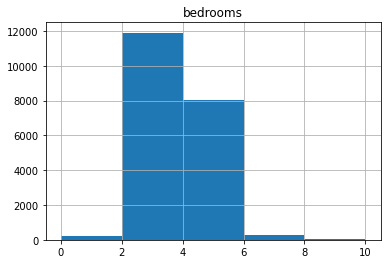

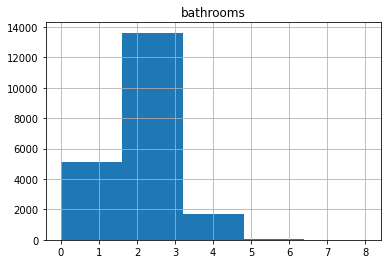

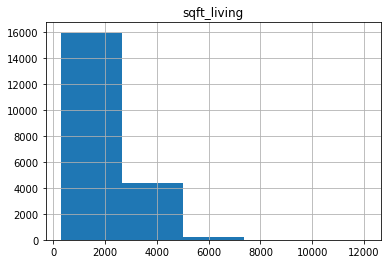

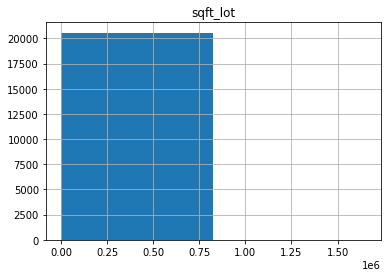

In [32]:
# Identify distribution for the variables bedroom, bathroom, sqft_living, sqft_lot
df.hist(column = 'bedrooms', bins = 5)
df.hist(column = 'bathrooms', bins = 5)
df.hist(column = 'sqft_living', bins = 5)
df.hist(column = 'sqft_lot', bins = 2)

In [33]:
# Replace missing bedroom, bathroom, sqft_living, sqft_lot count by the mean and median

df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace=True)
df['sqft_living'].replace(np.nan, df['sqft_living'].median(), inplace=True)
df['sqft_lot'].replace(np.nan, df['sqft_lot'].mean(), inplace=True)

In [34]:
# Display column unique count to check for outliers
print("Bedroom unique count:", df.bedrooms.unique())
print("Bathrooms unique count:", df.bathrooms.unique())
print("Floors unique count:", df.floors.unique())
print("Waterfront unique count:", df.waterfront.unique())
print("View unique count:", df.view.unique())
print("Condition unique count:", df.condition.unique())
print("Grade unique count:", df.grade.unique())

Bedroom unique count: [ 3.          2.          4.          5.          3.37135602  1.
  6.          7.          0.          8.          9.         10.        ]
Bathrooms unique count: [1.         2.25       3.         2.         4.5        1.5
 2.5        1.75       2.75       2.11350694 3.25       4.
 3.5        0.75       4.75       5.         4.25       3.75
 0.         5.25       6.         1.25       0.5        5.5
 5.75       8.         6.75       7.5        7.75       6.25
 6.5       ]
Floors unique count: [1.  2.  1.5 3.  2.5 3.5]
Waterfront unique count: [0 1]
View unique count: [0 3 4 2 1]
Condition unique count: [3 5 4 1 2]
Grade unique count: [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [35]:
# Mode of "view" column
print("View mode: ", df["view"].mode())

# Replace all "view" column values greater than 1 with the mode, "0"
df['view'].values[df['view'] > 1] = 0

# Confirm "view" unique count to confirm command above worked
# Check for remaining outliers
print("View unique count:", df.view.unique())

View mode:  0    0
dtype: int64
View unique count: [0 1]


In [36]:
# All values in "bedrooms", "bathrooms", and "floors" rounded to one decial place for consistency.
df['bedrooms'] = df['bedrooms'].round(1)
df['bathrooms'] = df['bathrooms'].round(1)
df['floors'] = df['floors'].round(1)

In [37]:
# Count of missing values per column
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Part 2: Data Analysis and Visualization

2.1 Identify categorical, ordinal, and numerical variables within data

In [38]:
df.head()

# Categorical data: Zipcode
# Ordinal data: condition, grade
# Numerical data: Price, Bedrooms, Bathroom, sqft_living, sqft_lot, sqft_above, floors, yr_built, sqft_living15, sqft_lot15
# Dates are not categorical, ordinal, nor numerical
# Waterfront, view, sqft_basement, yr_renovated are boolean

print("Categorical data: zipcode\nOrdinal data: condition, grade\nNumerical data: price, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, floors, yr_built, sqft_living15, sqft_lot15\ndates are not categorical, ordinal, nor numerical\nBoolean: waterfront, view, sqft_basement, yr_renovated")

Categorical data: zipcode
Ordinal data: condition, grade
Numerical data: price, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, floors, yr_built, sqft_living15, sqft_lot15
dates are not categorical, ordinal, nor numerical
Boolean: waterfront, view, sqft_basement, yr_renovated


2.2 Provide measures of centrality and distribution with visualizations

In [39]:
#Key statistics of studied variables
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372859,2.116684,2072.801277,1.517982e+04,1.494309,0.007542,0.015361,3.409430,7.656873,1788.390691,1971.005136,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.883290,0.746481,891.943876,4.047174e+04,0.539989,0.086517,0.122987,0.650743,1.175459,828.090978,29.373411,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.800000,1450.000000,5.140000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.100000,1920.000000,7.830000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2510.000000,1.186700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [40]:
# Houses without basements
basement_percent = round(sum(df.sqft_basement == 0.0) / len(df), 2)
print("Percentage of houses without basements:", basement_percent*100, "%" )

Percentage of houses without basements: 61.0 %


2.3 Diagnose for correlations between variables and determine independent and dependent variables

In [41]:
# Define correlation matrix
cor_matrix = df.corr().abs()

# Only reflect upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# Only print values in which correlation coefficient exceeds +/- 0.7
m1 = np.triu(np.ones(cor_matrix.shape).astype(bool))
m2 = cor_matrix.abs().ge(0.7)

cor_matrix.where(m1&m2).stack()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


price          price            1.000000
bedrooms       bedrooms         1.000000
bathrooms      bathrooms        1.000000
               sqft_living      0.715039
sqft_living    sqft_living      1.000000
               grade            0.744259
               sqft_above       0.850785
               sqft_living15    0.736945
sqft_lot       sqft_lot         1.000000
               sqft_lot15       0.717743
floors         floors           1.000000
waterfront     waterfront       1.000000
view           view             1.000000
condition      condition        1.000000
grade          grade            1.000000
               sqft_above       0.755923
               sqft_living15    0.713202
sqft_above     sqft_above       1.000000
               sqft_living15    0.731870
sqft_basement  sqft_basement    1.000000
yr_built       yr_built         1.000000
yr_renovated   yr_renovated     1.000000
zipcode        zipcode          1.000000
sqft_living15  sqft_living15    1.000000
sqft_lot15     s

In [42]:
# Cheapest houses
df_cheapest_price = df.sort_values('price')
df_cheapest_price.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
1149,2015-02-17,75000.0,1.0,0.0,670.0,43377.000000,1.0,0,0,3,3,670,False,1966,False,98022,1160,42882
15293,2014-05-06,78000.0,2.0,1.0,780.0,15179.820507,1.0,0,0,1,5,780,False,1942,False,98168,1700,10387
465,2014-05-23,80000.0,1.0,0.8,430.0,5050.000000,1.0,0,0,2,4,430,False,1912,False,98014,1200,7500
16198,2015-03-24,81000.0,3.4,2.1,730.0,9975.000000,1.0,0,0,1,5,730,False,1943,False,98168,860,9000
8274,2014-11-05,82000.0,3.0,1.0,860.0,10426.000000,1.0,0,0,3,6,860,False,1954,False,98146,1140,11250


In [43]:
# Houses with the highest sqft_living
df_highest_sqft_living = df.sort_values('sqft_living', ascending=False)
df_highest_sqft_living.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
7252,2014-10-13,7700000.0,6.0,8.0,12050.0,27600.000000,2.5,0,0,4,13,8570,True,1910,True,98102,3940,8800
3914,2014-06-11,7062500.0,5.0,4.5,10040.0,37325.000000,2.0,1,0,3,11,7680,True,1940,True,98004,3930,25449
8092,2014-06-17,4668000.0,5.0,6.8,9640.0,13068.000000,1.0,1,0,3,12,4820,True,1983,True,98040,3270,10454
4411,2014-08-04,5570000.0,5.0,5.8,9200.0,15179.820507,2.0,0,0,3,13,6200,True,2001,False,98039,3560,24345
14556,2014-06-11,2888000.0,5.0,6.2,8670.0,64033.000000,2.0,0,0,3,13,6120,True,1965,True,98177,4140,81021


2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Text(0, 0.5, 'Price')

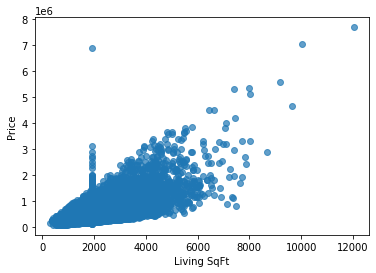

In [44]:
# Scatterplot for sqft_living (X) and price (Y)
plt.figure()
plt.scatter(df.sqft_living, df.price, alpha=0.7)

# Label axis
plt.xlabel('Living SqFt')
plt.ylabel('Price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


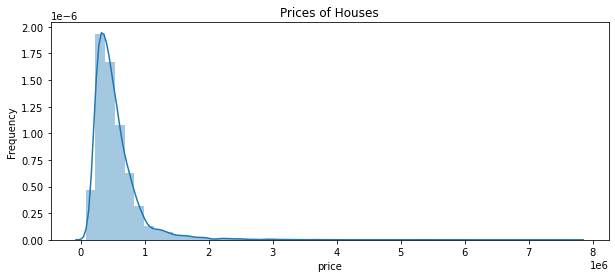

In [45]:
# Price distribution plot
plt.figure(figsize=(10, 4))
sns.distplot(df.price)

plt.title("Prices of Houses")
plt.ylabel("Frequency")
plt.show()

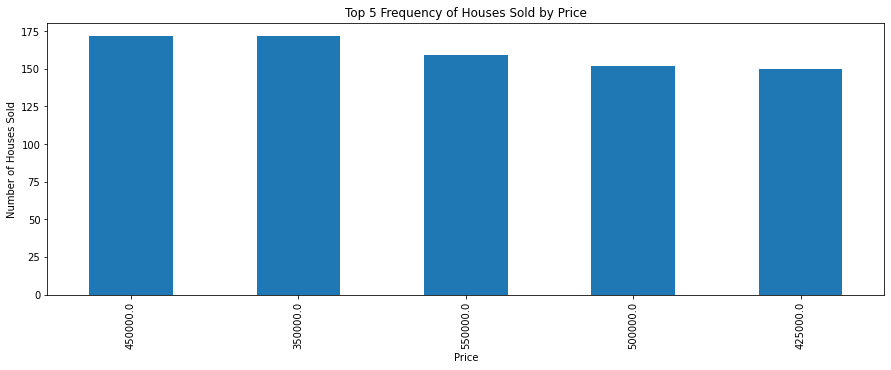

In [46]:
# Box plot of frequency of houses sold by price
top_house_price = df.groupby('price').agg({'price': 'count'})
top_house_price = top_house_price.price.sort_values(ascending=False).head(5)

top_house_price.plot(kind='bar', figsize=(15, 5))
plt.title("Top 5 Frequency of Houses Sold by Price")
plt.xlabel("Price")
plt.ylabel("Number of Houses Sold")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e2fff88d0>]],
      dtype=object)

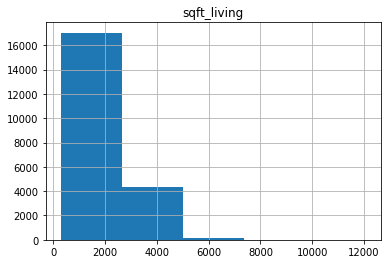

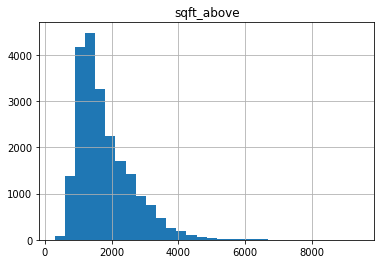

In [47]:
# Histogram of sqft_living and sqft_above

df.hist(column = 'sqft_living', bins = 5)
df.hist(column = 'sqft_above', bins = 30)

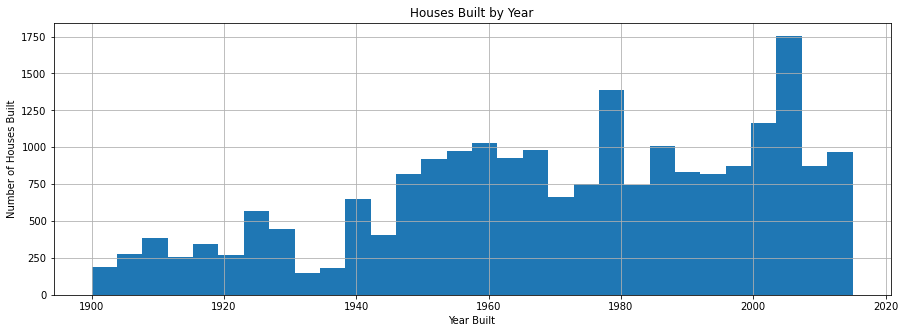

The most houses were built in 2014


In [48]:
# Histogram for houses built by year chronologically
df.hist(column = 'yr_built', bins = 30, figsize=(15, 5))

plt.title("Houses Built by Year")
plt.xlabel("Year Built")
plt.ylabel("Number of Houses Built")
plt.show()

year = df.sort_values(['yr_built']).head(1)
date = year[['date']].iloc[0, 0]
print("The most houses were built in",date.year)

Houses with a waterfront tend to cost more than houses without a waterfront.
There are more outliers for houses without a waterfront.


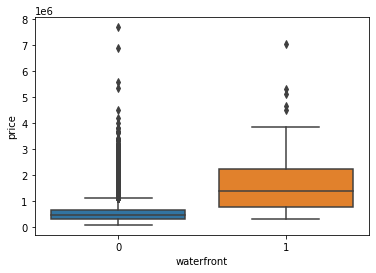

In [49]:
# Boxplot to compare prices of houses with and without waterfront

print("Houses with a waterfront tend to cost more than houses without a waterfront.\nThere are more outliers for houses without a waterfront.")

sns.boxplot(x="waterfront", y="price", data=df)
plt.show()

Text(0.5, 1.0, 'Relationship between Bedrooms and Price considering View')

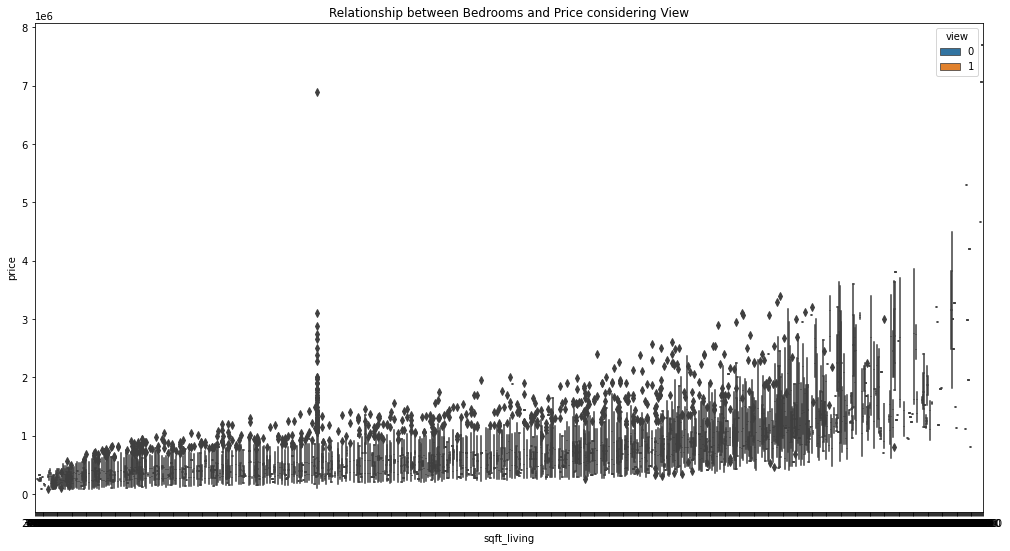

In [50]:
# Box plot to observe relationship between bedrooms and price while considering view
plt.figure(figsize = (17, 9))
sns.boxplot(x="sqft_living", y="price", hue="view", data=df)
plt.title("Relationship between Bedrooms and Price considering View")

# Part 3: Data Analytics

3.1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables

In [51]:
import statsmodels.api as sm

# Combine both bedrooms (X) and bathrooms (X)
X = df[['bedrooms', 'bathrooms']]
X = sm.add_constant(X) # Adds constant term
Y = df.price

lr_model = sm.OLS(Y, X).fit()

print(lr_model.summary())
print(lr_model.params) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3979.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:02:23   Log-Likelihood:            -3.0422e+05
No. Observations:               21613   AIC:                         6.084e+05
Df Residuals:                   21610   BIC:                         6.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.589e+04   8721.260     -6.409      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 0, 'Price')

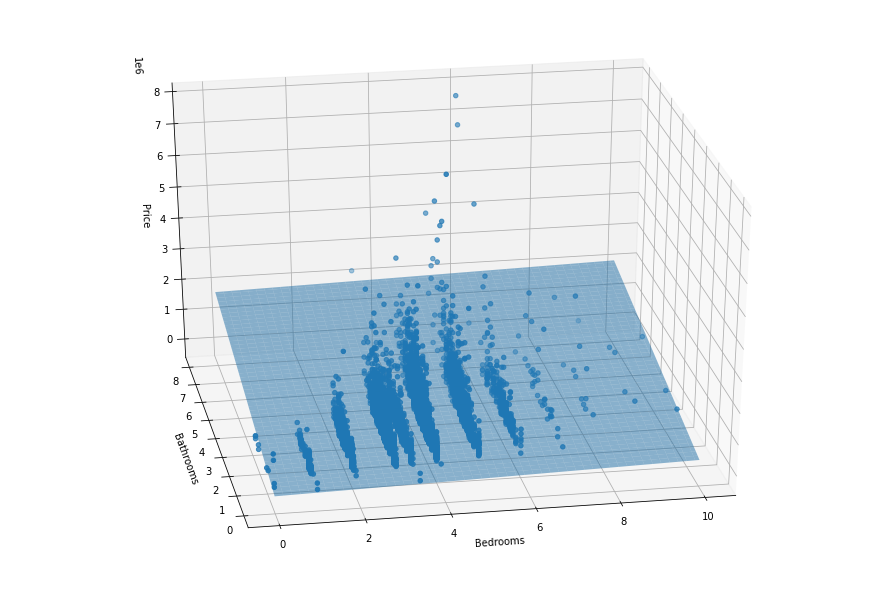

In [52]:
# Bedrooms x bathrooms x price
from mpl_toolkits.mplot3d import Axes3D

# Figure out X and Y axis using ranges from TV and Radio
X_axis, Y_axis = np.meshgrid(np.linspace(X.bedrooms.min(), X.bedrooms.max(), 100), np.linspace(X.bathrooms.min(), X.bathrooms.max(), 100))

# Plot the hyperplane by calculating corresponding Z axis (Sales)
Z_axis = lr_model.params[0] + lr_model.params[1] * X_axis + lr_model.params[2] * Y_axis

# Create matplotlib 3D axes
fig = plt.figure(figsize=(12, 8)) # figsize refers to width and height of the figure
ax = Axes3D(fig, azim=-100)

# Plot hyperplane
ax.plot_surface(X_axis, Y_axis, Z_axis, alpha=0.5, linewidth=0)

# Plot data points
ax.scatter(X.bedrooms, X.bathrooms, Y)
# set axis labels
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')

In [53]:
# Supervised learning: Predict price based on amount of bedrooms from bathrooms

3.2 Train, test, and provide accuracy and evaluation metrics for model results

In [54]:
# Import library
import statsmodels.api as sm

Y = df.price # Dependent variable
X = df.bedrooms # Independent variable
X = sm.add_constant(X) # Add constant term to predictor

# Establish linear regression model results
linreg_model = sm.OLS(Y,X).fit()
print(linreg_model.summary())

X_prime = np.linspace(df.bedrooms.min(), df.bedrooms.max(),100)
X_prime = sm.add_constant(X_prime)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2310.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:02:24   Log-Likelihood:            -3.0651e+05
No. Observations:               21613   AIC:                         6.130e+05
Df Residuals:                   21611   BIC:                         6.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.044e+05   9369.642     11.146      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
print("Correlation coefficient = ", np.corrcoef(df.bedrooms,df.price)[0,1])
print("\nThe regression model that uses 'bedrooms' to predict 'price' has a weak positive correlation.\nWe can predict that the more bedrooms there are, the higher the price of the house will be.\n")

Correlation coefficient =  0.31076656577065553

The regression model that uses 'bedrooms' to predict 'price' has a weak positive correlation.
We can predict that the more bedrooms there are, the higher the price of the house will be.



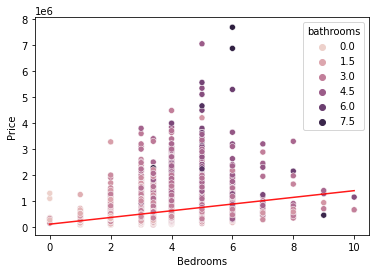

In [56]:
import seaborn as sns
# Calculate predicted value
Y_hat = linreg_model.predict(X_prime)

# Graph scatterplot 
sns.scatterplot(x = df.bedrooms, y = df.price, hue = df.bathrooms)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 

# Create labels for x and y axis
plt.xlabel("Bedrooms")
plt.ylabel("Price")

# Plot linear regression line
plt.plot(X_prime[:,1],Y_hat, 'red', alpha = 0.9)

In [57]:
print("Correlation coefficient = ", np.corrcoef(df.bedrooms,df.price)[0,1])
print("\nThe regression model that uses 'bedrooms' to predict 'price' has a weak positive correlation.\nWe can predict that the more bedrooms there are, the higher the price of the house will be.\n")

Correlation coefficient =  0.31076656577065553

The regression model that uses 'bedrooms' to predict 'price' has a weak positive correlation.
We can predict that the more bedrooms there are, the higher the price of the house will be.



In [58]:
# Use both independent variables (Bedrooms and Bathrooms) to predict Sqft living
y = df['price'] # Dependent variable
X = df[['bedrooms', 'bathrooms']] # Independent variable
X = sm.add_constant(X)

lr_model = sm.OLS(y,X).fit()

print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3979.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:02:26   Log-Likelihood:            -3.0422e+05
No. Observations:               21613   AIC:                         6.084e+05
Df Residuals:                   21610   BIC:                         6.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.589e+04   8721.260     -6.409      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
